In [29]:
import pickle

from SequentialClustering import SequentialClustering

myClustering: SequentialClustering = pickle.load(open("clustering.pkl", "rb"))

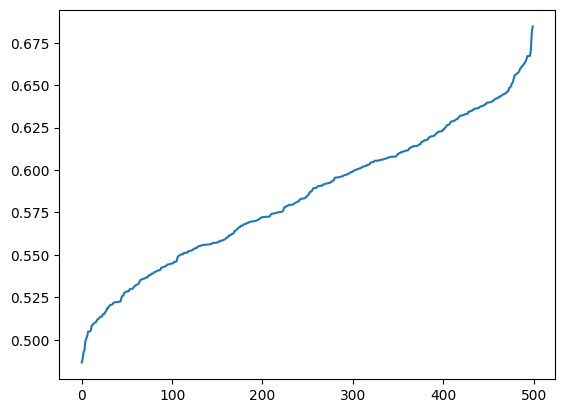

In [43]:
# find suitable dbscan parameters using the elbow method
min_samples = 7
# k nearest neighbor distance plot
embeddings = myClustering.embeddings
# normalize embeddings
from sklearn.preprocessing import normalize
embeddings = normalize(embeddings)

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(embeddings)
distances, indices = neigh.kneighbors(embeddings)
distances = np.sort(distances, axis=0)

plt.plot(distances[:, min_samples-1])
plt.show()


In [47]:
eps = 0.575

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

labels = dbscan.fit_predict(embeddings)


C:\bachelor\article-clustering\venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


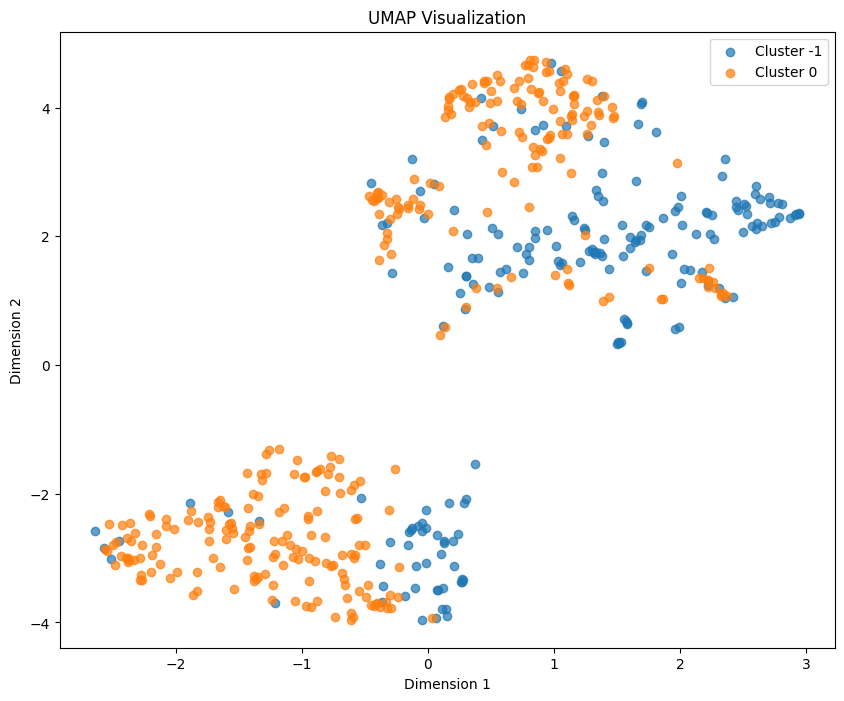

In [49]:
import numpy
from vizualization.viz_umap import plot_in_2d

plot_in_2d(embeddings, None, labels)